<div style="text-align: center; color:#FF9000">
    <h1><b>Assignment 4 - Machine Learning</b></h1>
    <h3>Artificial Intelligence - Spring 2024</h3></div>
<p style="text-align: center;text-decoration: underline">Alireza Hosseini</p>
<p style="text-align: center;text-decoration: underline">SID : 810100125</p>


<h2 style=color:#63B8FF><strong>Introduction</strong></h2>
In this assignment We will try to predict housing prices by a machine learning model that we train on previously collected data. We will have different algorithm and phases throughout the notebook to demonstrate the pros and cons of each.

<h3 style=color:green><strong>Analyzing the DataSet (EDA)</strong></h3>


In [30]:
import pandas as pd

dataset = pd.read_excel('/home/alireza/University/AI/assignments/A4/DataSet.xlsx')


#### 1. Total structure of our data 


In [31]:
print(dataset.describe)

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  

#### 2. Amount and proportion of missing values (percentage)

In [32]:
print(dataset.info())
print(dataset.isna().sum()/dataset.sum() * 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB
None
CRIM        0.000000
ZN          0.000000
INDUS       0.000000
CHAS       30.952381
NOX         0.000000
RM          0.000000
AGE         0.000000
DIS         0.907445
RAD         0.000000
TAX         0.000000
PTRATIO     0.000000

#### 3. Amount of different values for each feature :

- Cell below provides a bar chart consisting of amount of different values for each feature(or Column) available in our dataset. For example CHAS column has only 2 different values which means It's a binary feature!

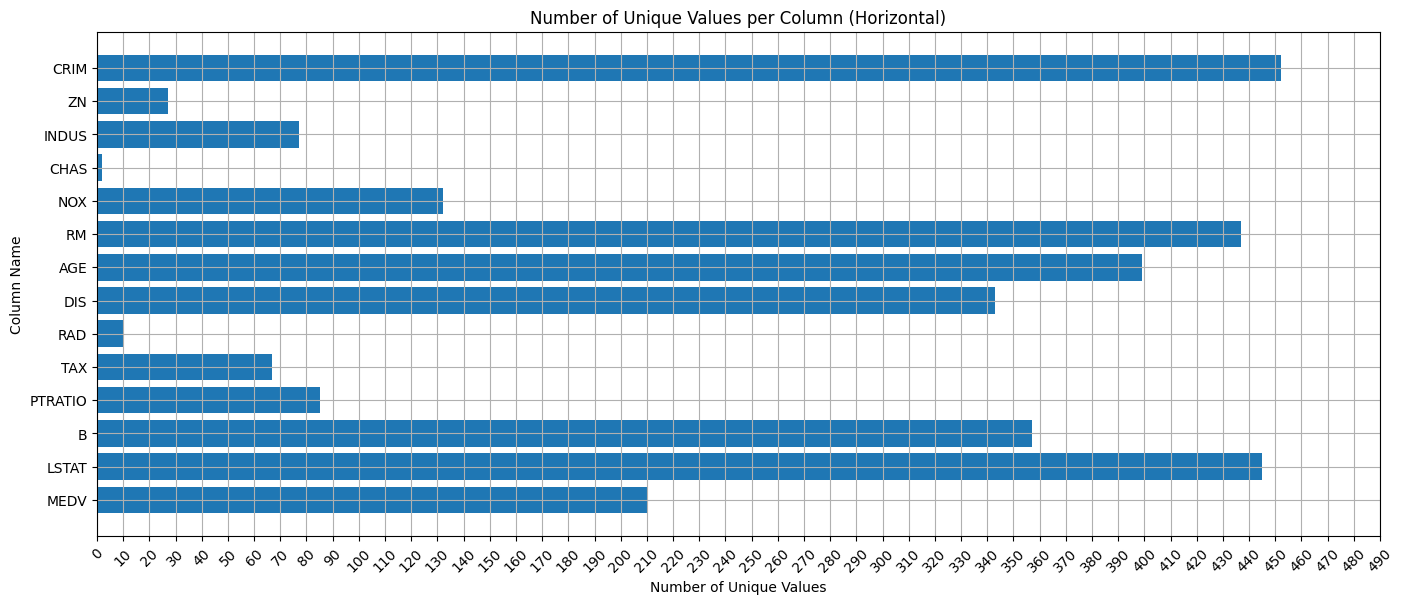

In [33]:
import matplotlib.pyplot as plt

n_unique = dataset.nunique()

plt.figure(figsize=(14, 6))
plt.barh(n_unique.index, n_unique.values)
plt.ylabel("Column Name")
plt.xlabel("Number of Unique Values")
plt.title("Number of Unique Values per Column (Horizontal)")
plt.gca().invert_yaxis()  # Invert y-axis to display most unique at the top
plt.tight_layout()
plt.xticks([x for x in range(0, 500, 10)],rotation=45)
plt.xticks()
plt.grid()
plt.show()

#### 4. Correlation of Our Target and other informations 

- below you can find heatmap of correlations between different columns. As you can see our Target (MEDV) has the highest correleation with RM value (0.74) and LSTAT (-0.71) This means those feature probably have a higher chance of affecting our target (either postivily or negatively) compared to other features, Though we must be careful __not to interpret correlation as causation !__

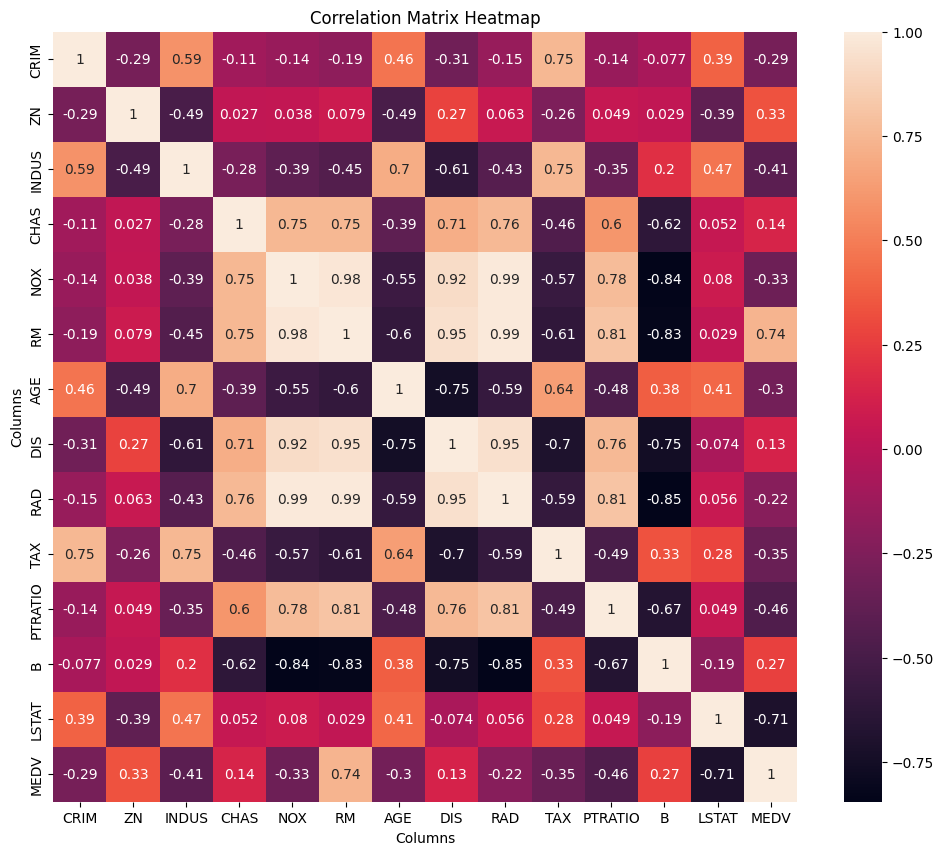

In [34]:
import seaborn as sbn
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 10))
sbn.heatmap(correlation_matrix, annot=True)  # Annotate with correlation values
plt.xlabel("Columns")
plt.ylabel("Columns")
plt.title("Correlation Matrix Heatmap")
plt.show()

#### 5. Plots to show correlations

While scatter plots are the more traditional choice, both scatter plots and hexbin plots can be used to visualize correlations between two variables in a dataset.
- __Scatter plots :__
    - pros :
        - Simple to create and interpret
        - Effective at showing individual data points and identifying outliers
        - Suitable for smaller datasets
    - cons :
        - Overplotting can occur with large datasets, obscuring patterns
        - May not reveal underlying density patterns in the data
- __Hexbin plots :__
    - pros :
        - Can handle large datasets effectively by aggregating data points into bins
        - Reveal density patterns in the data, highlighting areas of high correlation
    - cons :
        - Individual data points are not shown, potentially losing some detail
        - Requires choosing the appropriate bin size for clear visualization

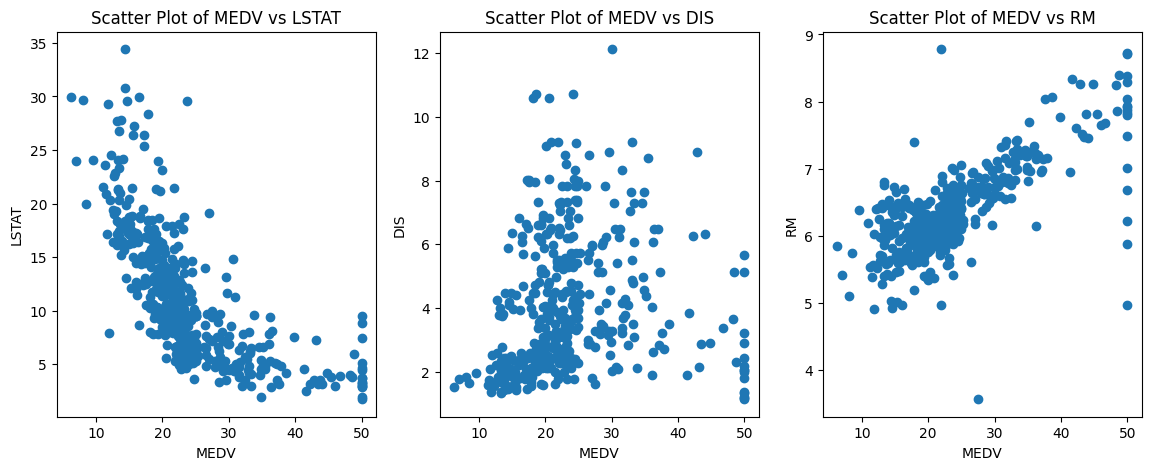

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

ax1.scatter(dataset['MEDV'], dataset['LSTAT']) # High Negative Correlation
ax1.set_xlabel("MEDV")
ax1.set_ylabel("LSTAT")
ax1.set_title("Scatter Plot of MEDV vs LSTAT")

ax2.scatter(dataset['MEDV'], dataset['DIS']) # Low Correlation
ax2.set_xlabel("MEDV")
ax2.set_ylabel("DIS")
ax2.set_title("Scatter Plot of MEDV vs DIS")

ax3.scatter(dataset['MEDV'], dataset['RM']) # High Positive Correlation
ax3.set_xlabel("MEDV")
ax3.set_ylabel("RM")
ax3.set_title("Scatter Plot of MEDV vs RM")

plt.show()

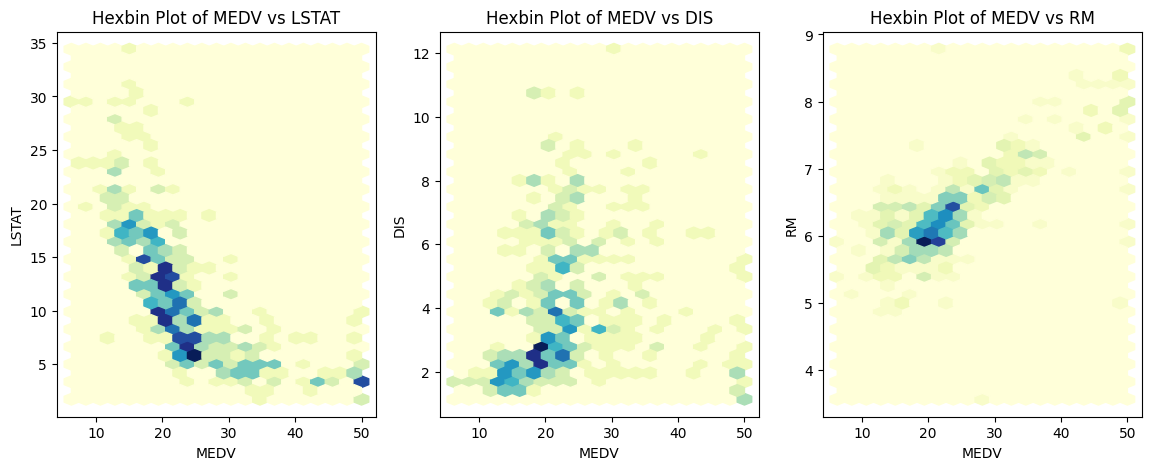

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 5))

ax1.hexbin(dataset['MEDV'], dataset['LSTAT'], gridsize=(20, 20), cmap='YlGnBu') # High Negative Correlation
ax1.set_xlabel("MEDV")
ax1.set_ylabel("LSTAT")
ax1.set_title("Hexbin Plot of MEDV vs LSTAT")

ax2.hexbin(dataset['MEDV'], dataset['DIS'], gridsize=(20, 20), cmap='YlGnBu') # Low Correlation
ax2.set_xlabel("MEDV")
ax2.set_ylabel("DIS")
ax2.set_title("Hexbin Plot of MEDV vs DIS")

ax3.hexbin(dataset['MEDV'], dataset['RM'], gridsize=(20, 20), cmap='YlGnBu') # High Positive Correlation
ax3.set_xlabel("MEDV")
ax3.set_ylabel("RM")
ax3.set_title("Hexbin Plot of MEDV vs RM")

plt.show()

#### 6. Other method of analysis before preprocessing data to furthur understand the dataset

- another method in EDA is identifying the data types of each feature in our dataset __(numerical, categorical, text, etc.)__. This is crucial for choosing appropriate analysis and preprocessing techniques. 

In [37]:
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


<h3 style=color:green><strong>Pre-Processing Data</strong></h3>


#### 7. Dealing with missing values 

- There are multiple way to deal with the missing values, but below we will only cover methods that involve filling/replacing them :
    - Replacing them with __Mean/Median/Min/Max__ for (numerical values) and __Mode__ (for both numerical and categorical)
        - It's straightforward and easy to implement, but might cause bias if the values are not normally distributed
    - K-Nearest Neighbors (KNN) Imputation
        - Useful when values are not normally distributed, But can be computionally expensive (Also the right K value must be chosen manually)
    - Model-based Imputation (Machine learning)
        - Can handle various datatypes and find complex relations between features, But requires an already trained model to predict the missing values

In [38]:
#dataset_filled = dataset.fillna(dataset.mean())
#dataset_filled = dataset.fillna(dataset.median())
dataset_filled = dataset.fillna(dataset.apply(lambda x: x.mode()[0]), inplace=False)
print(dataset_filled.isna().sum()/dataset.sum() * 100)

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64


#### 8. Which columns to drop?

- __Low Variance :__ Features with very little variation (all values are similar) might not provide much information for your analysis. We can calculate variance or use feature importance scores from models to identify such features.
- __Irrelevant Features :__ Features that are not directly related to the target variable or question We're trying to answer can be dropped. _Domain knowledge about the data can be helpful here._
- __Highly Correlated Features :__ If two features are highly correlated (meaning they move together), keeping one might be sufficient. Correlation analysis can help identify such features. However, dropping correlated features can lead to information loss, so we must be cautious.

In [39]:
# Variables' variance

print(dataset_filled.var())

CRIM           5.756194
ZN           531.242433
INDUS         51.403589
CHAS           0.138723
NOX            2.712578
RM           740.939612
AGE         1095.878071
DIS           56.342591
RAD        41429.409854
TAX        32641.676554
PTRATIO     7671.174819
B          14239.048591
LSTAT         36.783399
MEDV         135.110977
dtype: float64


- Based on above description We chose to :
    - drop "CHAS" because of the fact that 30% of values were missing at the beginning.
    - drop "NOX" because of its high correlation with "RM" and its low variance
    - drop "CRIM" for its low variance
    - drop "DIS" for its low correlation and low variance

In [40]:
dataset_filled.drop(columns=['CHAS', 'NOX', 'CRIM', 'DIS'], inplace=True)
print(dataset_filled)

       ZN  INDUS     RM   AGE  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0    18.0   2.31  6.575  65.2    1  296.0     15.3  396.90   4.98  24.0
1     0.0   7.07  6.421  78.9    2  242.0     17.8  396.90   9.14  21.6
2     0.0   7.07  7.185  61.1    2  242.0     17.8  392.83   4.03  34.7
3     0.0   2.18  6.998  45.8    3  222.0     18.7  396.90   2.94  33.4
4     0.0   2.18  7.147  54.2    3  222.0     18.7  396.90   5.33  36.2
..    ...    ...    ...   ...  ...    ...      ...     ...    ...   ...
501   0.0  11.93  6.593  69.1    1  273.0     21.0  391.99   9.67  22.4
502   0.0  11.93  6.120  76.7    1  273.0     21.0  396.90   9.08  20.6
503   0.0  11.93  6.976  91.0    1  273.0     21.0  396.90   5.64  23.9
504   0.0  11.93  6.794  89.3    1  273.0     21.0  393.45   6.48  22.0
505   0.0  11.93  6.030  80.8    1  273.0     21.0  396.90   7.88  11.9

[506 rows x 10 columns]


#### 9. Categorical vs. Numerical Features

__Categorical Variables (Qualitative Variables) :__ Categorical variables are variables that take on distinct categories or labels, which are often non-numerical in nature. They can be thought of as "labels" or "groups" that describe a characteristic or attribute of an observation.
- __Non-numerical:__ Categorical variables are not numerical in nature, meaning they don't have a inherent order or magnitude.
- __Discrete:__ Can only take on specific, distinct values.
- __Nominal:__ Categorical variables are often nominal, meaning they don't have a natural order or hierarchy.
- __Labels:__ Categorical variables are often represented as labels or categories.

- _Examples :_ Gender, Color, Blood Type

__Numerical Variables (Quantitative Variables) :__ Numerical variables are variables that take on numerical values, which can be measured or quantified.
- __Numerical:__ Numerical variables are numerical in nature, meaning they have a inherent order and magnitude.
- __Continuous:__ Numerical variables can take on any value within a certain range or interval.
- __Ordinal:__ Numerical variables can be ranked or ordered in a specific way.
- __Measurable:__ Numerical variables can be measured or quantified.
- _Examples :_ Height, Grades, Temperature

##### In our dataset, all columns are Numerical!

#### 10. Standardizing (Normalizing)

__Standardizing__ or __Normalizing__ numerical values is an important step in data preprocessing, which involves transforming numerical variables to a common scale, ensuring that all variables are on the same range. This process helps to :
- __Prevent feature dominance:__ When features have different scales, some features may dominate others in models, leading to biased results. Standardization prevents this by giving equal importance to all features.
- __Improve model performance:__ Standardization can improve the performance of many machine learning algorithms, such as neural networks, support vector machines, and k-means clustering.
- __Enhance interpretability:__ Standardization makes it easier to __compare__ and interpret the results of different models and features.

Their __key difference__ is the method used to achieve the results. While __Z-Score__ standardization (Mean of 0 and standard deviation of 1) is used for Standardizing, Normalizing takes advantage __Min-Max Scaling__ (rescaling the data to a common range usualy between 0 and 1).

In [41]:
dataset_filled = (dataset_filled - dataset_filled.min())/(dataset_filled.max() - dataset_filled.min())
print(dataset_filled)

       ZN     INDUS        RM       AGE       RAD       TAX   PTRATIO  \
0    0.18  0.083273  0.031253  0.647998  0.000000  0.399247  0.032209   
1    0.00  0.254867  0.029656  0.786573  0.001504  0.321077  0.038549   
2    0.00  0.254867  0.037578  0.606526  0.001504  0.321077  0.038549   
3    0.00  0.078587  0.035639  0.451767  0.003008  0.292125  0.040832   
4    0.00  0.078587  0.037184  0.536733  0.003008  0.292125  0.040832   
..    ...       ...       ...       ...       ...       ...       ...   
501  0.00  0.430065  0.031440  0.687446  0.000000  0.365953  0.046665   
502  0.00  0.430065  0.026535  0.764320  0.000000  0.365953  0.046665   
503  0.00  0.430065  0.035411  0.908965  0.000000  0.365953  0.046665   
504  0.00  0.430065  0.033524  0.891769  0.000000  0.365953  0.046665   
505  0.00  0.430065  0.025602  0.805792  0.000000  0.365953  0.046665   

            B     LSTAT      MEDV  
0    1.000000  0.099449  0.405034  
1    1.000000  0.226744  0.350114  
2    0.989737  

#### 11. Preprocessing of Categorical Values 

Some proper preprocessing techniques for categorical values :
- __Encoding :__
    - __One-Hot Encoding (OHE)__ : Creates a binary vector for each category, where all values are 0 except for one category, which is 1.
    - __Label Encoding__ : Assigns a unique integer value to each category.
- __Handling Missing Values:__
    - __Imputation__: Replaces missing values with the most frequent category or a specific value.
- __Feature Extraction :__ Feature extraction involves creating new features from existing categorical variables to improve model performance:
    - __Binary Features__: Creates binary features from categorical variables, where each category becomes a separate feature.


#### 12. Validation, Test & Train

It's essential to divide your dataset into __three parts : Training, Validation, and Testing__. Each set serves a specific purpose in the process.
- __Training Data (Train Set) :__
    - _Purpose : Train the model to recognize patterns and relationships in the data._
    - _Size : Typically, 60-80% of the total dataset._
- __Validation Data (Validation Set) :__
    - _Purpose: Evaluate the model's performance on unseen data and adjust hyperparameters._
    - _Size: Typically, 15-20% of the total dataset._
- __Testing Data (Test Set or Evaluation Set) :__
    - _Purpose: Evaluate the model's performance on unseen data and estimate its performance in real-world scenarios._
    - _Size: Typically, 5-20% of the total dataset._

Why do we separate Data ?
- ***Overfitting prevention*** : Training a model on the entire dataset can lead to overfitting.
- ***Hyperparameter tuning*** : The validation set helps you tune hyperparameters, such as learning rate, batch size, or number of hidden layers, to optimize the model's performance.
- ***Real-world performance estimation*** : The test set helps estimate the model's performance in real-world scenarios, where the data may be different from the training data

In [42]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (85% for training and 15% for testing)
train_data, test_data = train_test_split(dataset_filled, test_size=0.15, random_state=42)

# Split the training set into training and validation sets (90% for training and 10% for validation)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

print(train_data)
print(test_data)
print(val_data)

       ZN     INDUS        RM       AGE       RAD       TAX   PTRATIO  \
225  0.00  0.223504  0.053547  0.828045  0.010526  0.415171  0.037535   
56   0.85  0.026676  0.029262  0.349605  0.001504  0.423856  0.037281   
499  0.00  0.349315  0.020821  0.731952  0.007519  0.536769  0.042100   
451  0.00  0.652487  0.032082  0.981793  0.034586  0.934858  0.044636   
5    0.00  0.078587  0.029749  0.582250  0.003008  0.292125  0.040832   
..    ...       ...       ...       ...       ...       ...       ...   
441  0.00  0.652487  0.029501  0.971678  0.034586  0.934858  0.044636   
383  0.00  0.652487  0.020313  1.000000  0.034586  0.934858  0.044636   
382  0.00  0.652487  0.020479  1.000000  0.034586  0.934858  0.044636   
1    0.00  0.254867  0.029656  0.786573  0.001504  0.321077  0.038549   
192  0.45  0.124009  0.037506  0.254524  0.006015  0.546902  0.031955   

            B     LSTAT      MEDV  
225  1.000000  0.088739  1.000000  
56   1.000000  0.123623  0.421053  
499  0.997151  

#### 13. Other preprocessing Methods 

Some of the popular preprocessing methods :
- Handling Outliers
- Handling Imbalanced Data
- Dimensionality Reduction

#### 14. Supervised, Unsupervised, Semi-supervised & Reinforcement

- __*Supervised Learning :*__
    - __Data :__ Labeled dataset, where each data point X belongs to an input space X and has a corresponding label y belonging to an output space Y. The label provides the desired output or ground truth for the learning algorithm.
    - __Objective :__ Learn a mapping function f: X -> Y from the labeled data that minimizes a loss function L(f(X), y). This loss function quantifies the difference between the predicted output f(X) and the true label y.
    - __Common Tasks :__ Classification (predicting discrete labels), Regression (predicting continuous values), Function Approximation
- __*Unsupervised Learning :*__
    - __Data :__ Unlabeled dataset, where each data point X belongs to an input space X. There are no predefined labels or categories associated with the data.
    - __Objective :__ Uncover hidden structures or patterns within the data. This could involve:
        - Clustering : Grouping similar data points together based on some distance or similarity measure.
        - Dimensionality Reduction : Finding a lower-dimensional representation of the data that captures most of the important information.
        - Density Estimation : Learning the probability distribution of the data.
    - __Common Techniques :__ K-Means Clustering, Principal Component Analysis (PCA), Autoencoders
- __*Semi-supervised Learning :*__
    - __Data :__ A combination of labeled data {(X₁, y₁), ..., (Xₙ, yₙ)} and a larger set of unlabeled data {Xₙ₊₁, ..., Xᵐ}.
    - __Objective :__ Leverage the labeled data to learn a model that can also make predictions on the unlabeled data. Techniques include:
    - __Label Propagation :__ Propagating labels from labeled data points to nearby unlabeled points based on the model's predictions.
    - __Co-training :__ Training multiple models on different views of the data and using their agreement to improve labeling for unlabeled data.
    - __Advantage :__ Improves learning performance when labeled data is scarce.
- __*Reinforcement Learning :*__
    - __Agent :__ An agent interacts with an environment through actions.
    - __Environment :__ Provides the agent with observations (states) S and rewards R based on its actions.
    - __Objective :__ The agent learns a policy π: S -> A that maps states to actions, aiming to maximize the expected cumulative reward over time.
    - __Learning :__ Reinforcement learning algorithms employ techniques like Q-learning or Policy Gradient methods to learn the optimal policy through trial and error.
    - __Common Applications :__ Robotics Control, Game Playing, Resource Management

# Linear Regression (Phase 1)

#### 15. What is regression? What are its key differences compared to other classification methods?

Regression, unlike classification methods, deals with predicting continuous values  rather than discrete categories.
- __*Target Variable :*__
    - __Regression__ -> Continuous variable. _Examples: predicting house prices, temperature, or stock prices._
    - __Classification__ -> Discrete variable. _Examples: classifying emails as spam or not spam, identifying handwritten digits (0-9), or image recognition (cat vs dog)._
- __*Model Output :*__
    - __Regression :__ A numerical value representing the predicted continuous quantity.
    - __Classification :__ A class label representing the category the data point belongs to.
- __*Loss Function :*__
    - __Regression :__ Loss functions measure the difference between the predicted continuous value and the actual value. Common examples include Mean Squared Error (MSE) or Absolute Error.
    - __Classification :__ Loss functions measure how well the model separates data points into different classes. Examples include Cross-Entropy loss for multi-class classification or Hinge loss for Support Vector Machines (SVMs).
- __*Evaluation Metrics :*__
    - __Regression :__ Metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or R-squared are used to evaluate the model's performance in predicting continuous values.
    - __Classification :__ Metrics like accuracy, precision, recall, and F1-score are used to assess how well the model classifies data points into different categories.
- *Key Point :* __Regression__ focuses on modeling the relationship between input features and a continuous output variable, while __Classification__ aims to assign data points to discrete categories. 

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



#### 16. Formulas Explaination



- Slope( $\hat{\beta}$ ) : Indicates the direction and strength of the linear relationship.
- Intercept( $\hat{\alpha}$ ) : represents the predicted value of Y when X is zero (assuming the linear relationship holds true at X = 0).
- By minimizing __RSS function__ in terms of $\hat{\alpha}$ and $\hat{\beta}$ we try to __minimize__ the __error__ and thus the loss function.

#### 17. Complete linear_regression function and choose the most effective feature

The effectiveness of a feature depends on various factors, such as the underlying relationships between the variables, the quality of the data, and the specific problem We are trying to solve. 
- __Strongly correlated features :__ Features that are strongly correlated with the target variable (response variable) tend to be more effective in linear regression.
- __Numerical features :__ Numerical features, such as continuous or integer-valued features, tend to be more effective than categorical features. This is because numerical features can be directly used in the linear regression equation, whereas categorical features need to be encoded or transformed.

##### Considering the factors mentioned, I believe feature __LSTAT__ or __RM__ are prime candidates to be used in linear regression for prediction (but we will test more than just these 2 features just to analyze the results)

In [43]:
import numpy as np

def linear_regression(input, output):
  input_sum = np.sum(input)
  output_sum = np.sum(output)
  SS = np.sum(input ** 2)
  slope = (np.sum(input * output) - (len(output) * (input_sum / len(input)) * (output_sum / len(output)))) / (SS - len(input) * ((input_sum / len(input)) ** 2))
  intercept = (output_sum / len(output)) - slope * (input_sum / len(input))
  return slope, intercept

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [44]:
def get_regression_predictions(input, intercept, slope):
    prediction = [(slope * x) + intercept for x in input]
    return prediction

#### 18. RSS, MSE, RMSE &R2 Score

1. **Mean Squared Error (MSE)**:
   - Definition: MSE measures the average squared difference between the estimated values and the actual value. It is a way to quantify the error of a model's predictions.
   - $ MSE = \frac{1}{n} \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2 $

2. **Root Mean Squared Error (RMSE)**:
   - Definition: RMSE is the square root of the mean squared error. It measures how well a regression model predicts the outcome of interest.
   - $ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2} $

3. **Residual Sum of Squares (RSS)**:
   - Definition: RSS is the sum of the squared differences between the observed dependent variable and the value predicted by the model.
   - $ RSS = \Sigma_{i=1}^{n} (y_i - \hat{y_i})^2 $

4. **R-squared (R²) Score**:
   - Definition: R² is the proportion of variance in the dependent variable that can be predicted from the independent variable(s). It is a statistic that will give some information about the goodness of fit of a model.
   - $R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $


In [45]:
def get_root_mean_square_error(predicted_values, actual_values):
  return np.sqrt(np.mean(np.square(np.subtract(predicted_values, actual_values))))


The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

In [46]:
def get_r2_score(predicted_values, actual_values):
  return 1-(np.sum((predicted_values - actual_values) ** 2) / np.sum(predicted_values - np.mean(actual_values)))


#### 19. Evaluation using R2 Score & RMSE

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [47]:
designated_feature_list = list(dataset_filled.columns)
designated_feature_list.remove('MEDV')
y_pred = dict()

scores = dict()

for feature in designated_feature_list:
  print(f"feature : {feature}")
  slope, intercept = linear_regression(train_data[feature], train_data['MEDV'])
  prediction = get_regression_predictions(test_data[feature], slope, intercept)
  y_pred[feature] = prediction
  print(f"R2 Score : {get_r2_score(prediction, test_data['MEDV'])}\nRMSE : {get_root_mean_square_error(prediction, test_data['MEDV'])}")
  print('____________________________________')

feature : ZN
R2 Score : 1.7902523049238948
RMSE : 0.20533198022243387
____________________________________
feature : INDUS
R2 Score : 1.9154215970850896
RMSE : 0.8276884388642363
____________________________________
feature : RM
R2 Score : 0.6022878732944565
RMSE : 0.33716075764855324
____________________________________
feature : AGE
R2 Score : 1.8573273792672302
RMSE : 0.6063314439826215
____________________________________
feature : RAD
R2 Score : 0.6349293607332974
RMSE : 0.27932805248936743
____________________________________
feature : TAX
R2 Score : 1.9046231530087638
RMSE : 0.7825129235286743
____________________________________
feature : PTRATIO
R2 Score : 0.5937408947324357
RMSE : 0.3300062461760721
____________________________________
feature : B
R2 Score : 2.6976419954637443
RMSE : 0.3540028890718111
____________________________________
feature : LSTAT
R2 Score : 1.976686331586091
RMSE : 0.9175631492059334
____________________________________


##### Scores Explaination :
- __*R2 Score :*__ Since our dataset is normalized, the R2 score is not affected by the scale of the data. It's range is between 0 and 1 : 
    - The higher score means higher correlation and better explaination of the dependent variable.
    - ‌Score greater than 1 or less than 0 can indicate __Overfitting__, __Non-normality__, __Measurement error__, __Multicollinearity__ or __Model misspecification__.
- __*RMSE :*__ Since your dataset is normalized, the RMSE values are relative to the scale of the data. In this case the range will be between 0 and 1 :
    - The higher RMSE means higher Error thus lower accuracy of the model (avg. distance between real and pred. higher)

- Considering above explainations, feature ${RAD}$ or ${RM}$ are good candidates. 

#### 20. Comparing Prediction vs Actual values using Scatter Plots

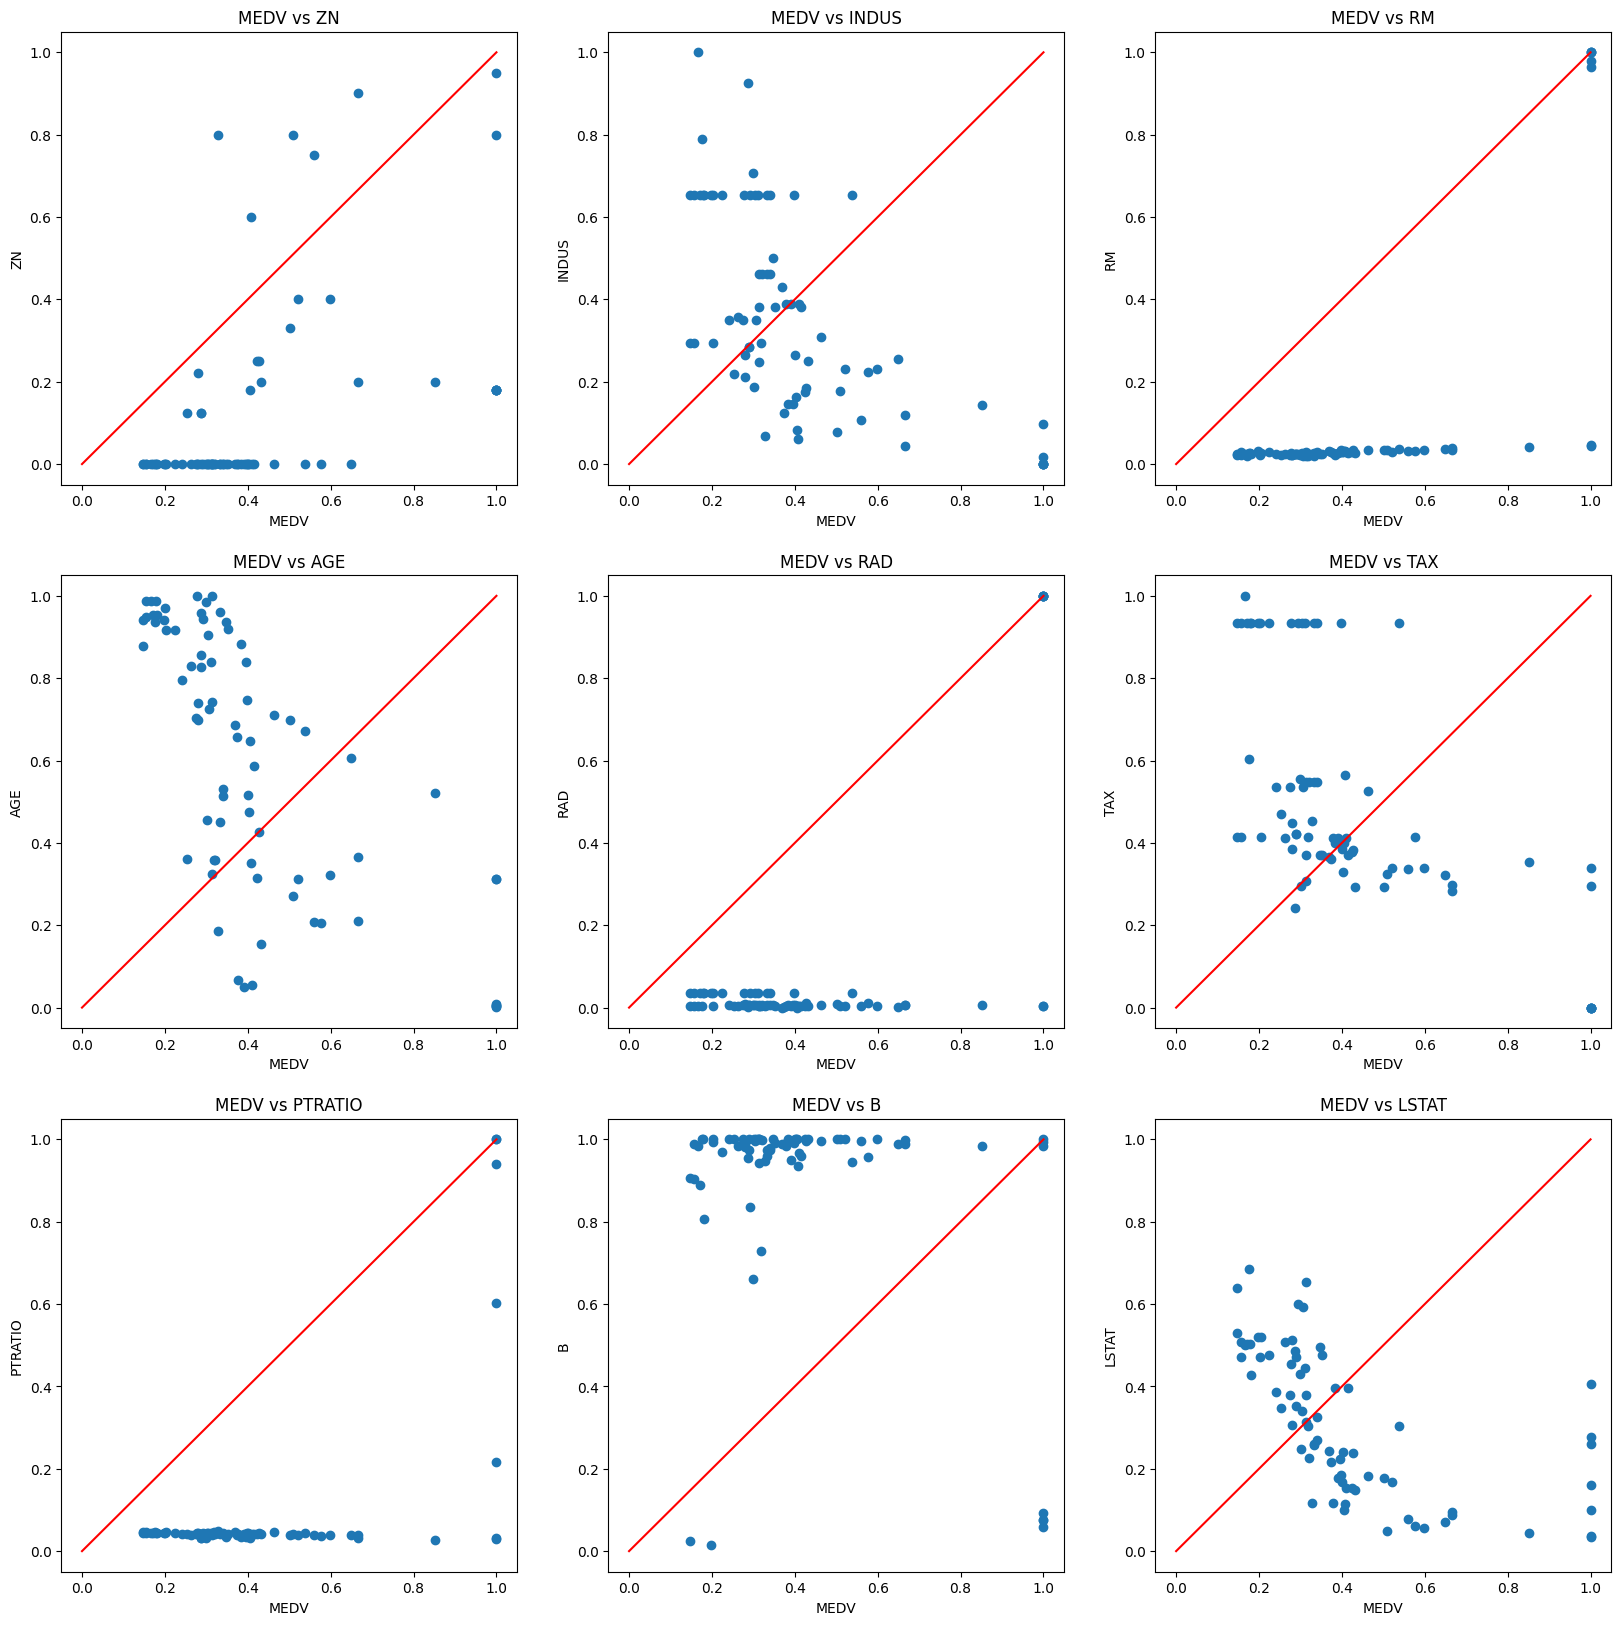

In [48]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20, 20))

ax1.scatter(test_data['MEDV'], test_data['ZN'])
ax1.set_xlabel("MEDV")
ax1.set_ylabel("ZN")
ax1.set_title("MEDV vs ZN")
ax1.plot([0, 1], [0, 1], c='red')

ax2.scatter(test_data['MEDV'], test_data['INDUS'])
ax2.set_xlabel("MEDV")
ax2.set_ylabel("INDUS")
ax2.set_title("MEDV vs INDUS")
ax2.plot([0, 1], [0, 1], c='red')

ax3.scatter(test_data['MEDV'], test_data['RM'])
ax3.set_xlabel("MEDV")
ax3.set_ylabel("RM")
ax3.set_title("MEDV vs RM")
ax3.plot([0, 1], [0, 1], c='red')

ax4.scatter(test_data['MEDV'], test_data['AGE'])
ax4.set_xlabel("MEDV")
ax4.set_ylabel("AGE")
ax4.set_title("MEDV vs AGE")
ax4.plot([0, 1], [0, 1], c='red')

ax5.scatter(test_data['MEDV'], test_data['RAD'])
ax5.set_xlabel("MEDV")
ax5.set_ylabel("RAD")
ax5.set_title("MEDV vs RAD")
ax5.plot([0, 1], [0, 1], c='red')

ax6.scatter(test_data['MEDV'], test_data['TAX'])
ax6.set_xlabel("MEDV")
ax6.set_ylabel("TAX")
ax6.set_title("MEDV vs TAX")
ax6.plot([0, 1], [0, 1], c='red')

ax7.scatter(test_data['MEDV'], test_data['PTRATIO'])
ax7.set_xlabel("MEDV")
ax7.set_ylabel("PTRATIO")
ax7.set_title("MEDV vs PTRATIO")
ax7.plot([0, 1], [0, 1], c='red')

ax8.scatter(test_data['MEDV'], test_data['B'])
ax8.set_xlabel("MEDV")
ax8.set_ylabel("B")
ax8.set_title("MEDV vs B")
ax8.plot([0, 1], [0, 1], c='red')

ax9.scatter(test_data['MEDV'], test_data['LSTAT'])
ax9.set_xlabel("MEDV")
ax9.set_ylabel("LSTAT")
ax9.set_title("MEDV vs LSTAT")
ax9.plot([0, 1], [0, 1], c='red')

# Classification (Phase 2)

#### 21. What is pruning? (Decision Trees)

__Pruning__ refers to a technique used to control the complexity of the __tree__ and __prevent overfitting__. Pruning strategically cuts off certain branches to make the tree simpler and __more generalizable to unseen data__.

__*Benefits of Pruning :*__

- __Prevents Overfitting__ : By removing unnecessary branches, helps the tree focus on the most important features for classification or prediction. it reduces the risk of the model memorizing the training data and failing to perform well on unseen data.
- __Improves Interpretability__ : A simpler tree is generally easier to understand and interpret. You can see which __features__ are most important for making decisions at each level of the tree.
- __Reduces Training Time__ : Smaller trees require __less computational resources__ to train and make predictions.

__*Trade-offs :*__

- __Finding the Right Balance__ : Pruning too aggressively can lead to underfitting.
- __Data Dependence__ : The effectiveness of pruning can depend on the __quality__ and __size__ of the training data.

__*Common Pruning Techniques :*__
- __Cost-Complexity Pruning__ : This method assigns a cost to the complexity of the tree and another cost to the model's performance on the training data. Pruning removes branches that increase the overall cost.
- __Reduced-Error Pruning__ : This approach evaluates the impact of removing a subtree on the classification error on a validation set. Subtrees that lead to a larger increase in error are pruned.

#### 22. What are some upsides of Decision Trees compared to other methods of Classification?

- __*Handling Heterogeneous Data :*__ Decision trees can handle __mixed data types__, including categorical, numerical, and ordinal features, without extensive preprocessing. 
- __*Interpretability :*__ The tree structure itself provides a clear __visual representation__ of the decision-making process. 
- __*No Need for Feature Scaling :*__ Unlike some methods like Support Vector Machines (SVMs) that are sensitive to feature scaling, decision trees are relatively __insensitive__ to the scale of the features.
- __*Efficient for Large Datasets :*__ Decision trees can be very __efficient__ in terms of __training time__ and __memory usage__, especially for large datasets. 
- __*Robust to Irrelevant Features :*__ Decision trees are relatively robust to irrelevant features in the data. The splitting process inherently discards features that don't contribute to the classification task.

#### 23. KNN's primary difference compared to Neural Nets and Logistic Regression

- Unlike Neural Networks and Logistic Regression that __learn__ complex models through __training__, K-Nearest Neighbors (KNN) __memorizes__ the training data. During prediction, KNN classifies new data points based on the __majority vote__ of their nearest neighbors in the training data, making it __fast for prediction__ but potentially __less accurate for complex relationships__ compared to other methods.

#### 24. One-Nearest Neighbor

__The 1-Nearest Neighbor (1-NN)__ algorithm is a special case of the __K-Nearest Neighbors (KNN)__ classification method where K is set to 1. Essentially, 1-NN makes predictions based solely on the __single most similar data point__ in the training set.
- __*Advantages :*__
    - __Simple__ to implement and understand
    - No complex model __training__ is required
    - Can handle data with __mixed feature__ types
- __*Disadvantages :*__
    - Sensitive to __noise__ and outliers in the training data
    - Performance can be affected in __high-dimensional__ spaces
    - Can be __computationally expensive__ for large datasets due to the __distance calculations__ for each new data point.

#### 25. KNN Popular Distance Metrics :

- __*Euclidean Distance :*__
    - __Formula :__ $d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$
    - **Advantages :** Simple to understand and implement, works well for numerical data.
    - **Disadvantages :** Sensitive to features with different scales. Features with larger scales can dominate the distance calculation.
- __*Manhattan Distance :*__
    - __Formula :__ $d(x, y) = \sum_{i=1}^{n} |x_i - y_i|$
    - **Advantages :** Less sensitive to outliers than Euclidean distance.
    - **Disadvantages :** May not be suitable for all types of data, especially when features have inherent geometric relationships.
- __*Minkowski Distance :*__
    - __Formula :__ $d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^\frac{1}{p}$ ( `p`: Minkowski parameter (`p=1` -> Manhattan distance, `p=2` -> Euclidean distance))
    - **Advantages:** Offers flexibility for specific data characteristics by adjusting the p value.
    - **Disadvantages:** Choosing the optimal p can be challenging for complex datasets.
- __*Hamming Distance :*__
    - Specifically designed for __categorical__ data, counting the number of mismatches between corresponding features of two data points.
    - __Formula :__ $d(x, y) = \sum_{i=1}^{n} \mathbb{I}(x_i \neq y_i)$ (where $\mathbb{I}$ is the indicator function)

- __*Cosine Similarity :*__
    - This metric measures the __directional similarity__ between two data points, focusing on the __angle between the vectors__ representing the data points.
    - __Formula :__ $d(x, y) = 1 - \frac{\sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i=1}^{n} x_i^2} \sqrt{\sum_{i=1}^{n} y_i^2}}$
    

#### 26. Prediction Using KNN & Decision Tree

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

luxury_threshold = int(0.2 * len(train_data))  # Top 20%
normal_threshold = int(0.6 * len(train_data))  # Middle 60%
economic_threshold = len(train_data) - luxury_threshold  # Bottom 20%

sorted_data = dataset_filled.sort_values(by='MEDV', ascending=False)
sorted_data['label'] = 1 #Normal

sorted_data.reset_index(inplace=True)
sorted_data.loc[:luxury_threshold-1, 'label'] = 2 #Luxury
sorted_data.loc[economic_threshold:, 'label'] = 0 #Economic

# Split into training and testing sets (85% for training and 15% for testing)
sorted_train_data, sorted_test_data = train_test_split(sorted_data, test_size=0.15, random_state=42)

# Split the training set into training and validation sets (90% for training and 10% for validation)
sorted_train_data, sorted_val_data = train_test_split(sorted_train_data, test_size=0.1, random_state=42)

KNN = KNeighborsClassifier(n_neighbors=3, p=1.5, weights='distance')
KNN.fit(sorted_train_data.drop(['label', 'MEDV'], axis=1), sorted_train_data['label'])

KNeighborsClassifier(n_neighbors=3, p=1.5, weights='distance')

Accuracy :  0.7105263157894737
Precision :  0.7136200716845877
Recall :  0.7002541757443718
F1 Score :  0.7053571428571428


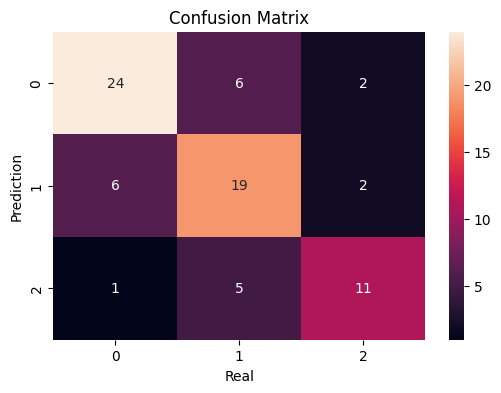

In [50]:
from sklearn.metrics import confusion_matrix

KNN_Predictions = KNN.predict(sorted_test_data.drop(['label', 'MEDV'], axis=1))

print('Accuracy : ', accuracy_score(sorted_test_data['label'], KNN_Predictions))
print('Precision : ', precision_score(sorted_test_data['label'], KNN_Predictions, average='macro'))
print('Recall : ', recall_score(sorted_test_data['label'], KNN_Predictions, average='macro'))
print('F1 Score : ', f1_score(sorted_test_data['label'], KNN_Predictions, average='macro'))

plt.figure(figsize=(6, 4))
sbn.heatmap(confusion_matrix(sorted_test_data['label'].to_numpy(), KNN_Predictions), annot=True)
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=3)

decisionTree.fit(sorted_train_data.drop(['label', 'MEDV'], axis=1), sorted_train_data['label'])

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                       random_state=42)

Accuracy :  0.7763157894736842
Precision :  0.7871017871017871
Recall :  0.7542665214233842
F1 Score :  0.7655420602789024


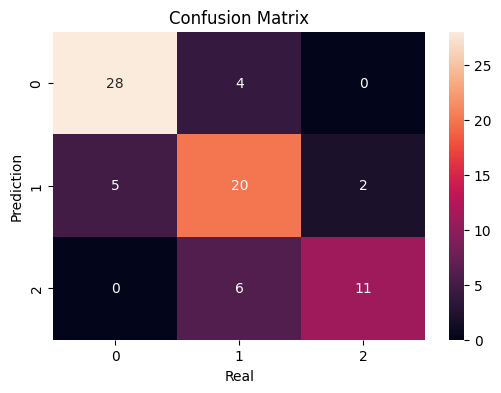

In [52]:
decisionTree_pred = decisionTree.predict(sorted_test_data.drop(['label', 'MEDV'], axis=1))

print('Accuracy : ', accuracy_score(sorted_test_data['label'], decisionTree_pred))
print('Precision : ', precision_score(sorted_test_data['label'], decisionTree_pred, average='macro'))
print('Recall : ', recall_score(sorted_test_data['label'], decisionTree_pred, average='macro'))
print('F1 Score : ', f1_score(sorted_test_data['label'], decisionTree_pred, average='macro'))

plt.figure(figsize=(6, 4))
sbn.heatmap(confusion_matrix(sorted_test_data['label'].to_numpy(), decisionTree_pred), annot=True) 
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

#### 27. Using GridSearchCV to find best hyperparameters

__*GridSearchCV* :__ a Class that performs exhaustive search over a grid of hyperparameters to find the best combination that optimizes a model's performance.

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1, 2, 3, 5,10],
    'p': [1, 1.2, 1.4, 1.6, 2]
}

knc = KNeighborsClassifier()
grid_search = GridSearchCV(knc, param_grid, cv=4, scoring='accuracy')
grid_search.fit(sorted_train_data.drop(['label', 'MEDV'], axis=1), sorted_train_data['label'])

print("Best Parameters : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)

Best Parameters :  {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
Best Score :  0.7675311426116839


Best Parameters :  {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 3}
Best Score :  0.8472194472194472


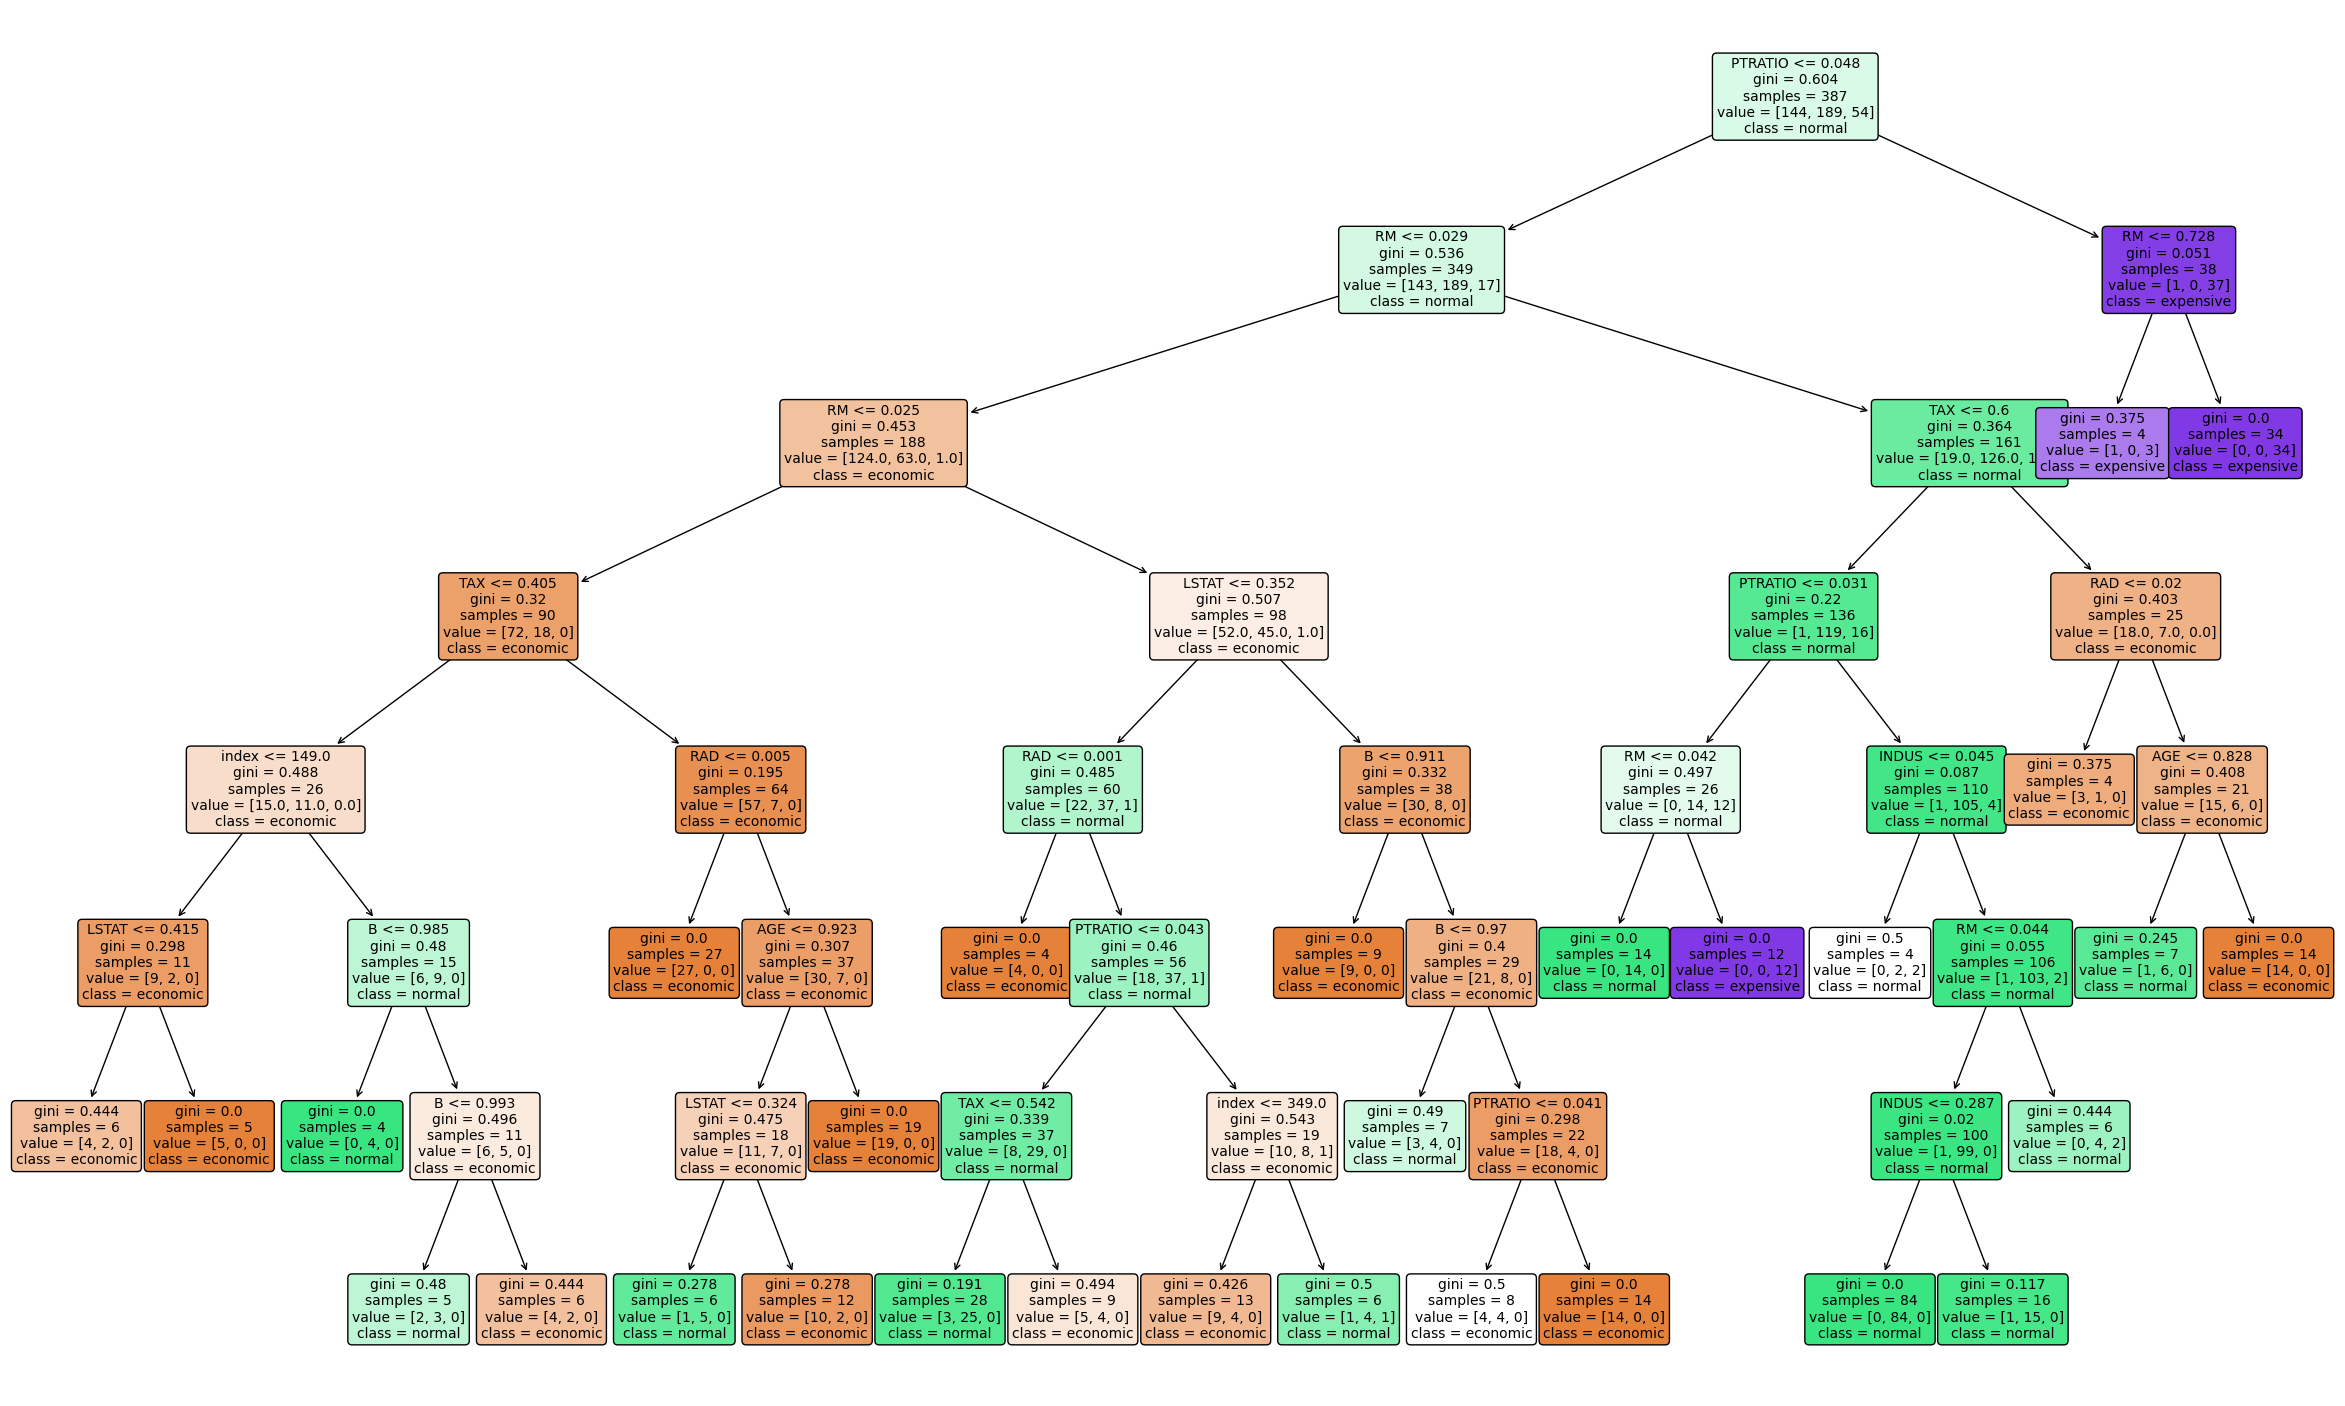

In [54]:
from sklearn.tree import plot_tree

param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5, 7, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 7, 9],
    'min_samples_leaf': [2, 3, 4, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(sorted_train_data.drop(['label', 'MEDV'], axis=1), sorted_train_data['label'])

print("Best Parameters : ", grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)

plt.figure(figsize=(30, 18))
plot_tree(grid_search.best_estimator_, filled=True, rounded=True, 
          feature_names=sorted_train_data.columns, 
          class_names=['economic', 'normal', 'expensive'], 
          impurity=True, fontsize=10, )
plt.show()

#### 28. Decision Tree Plot

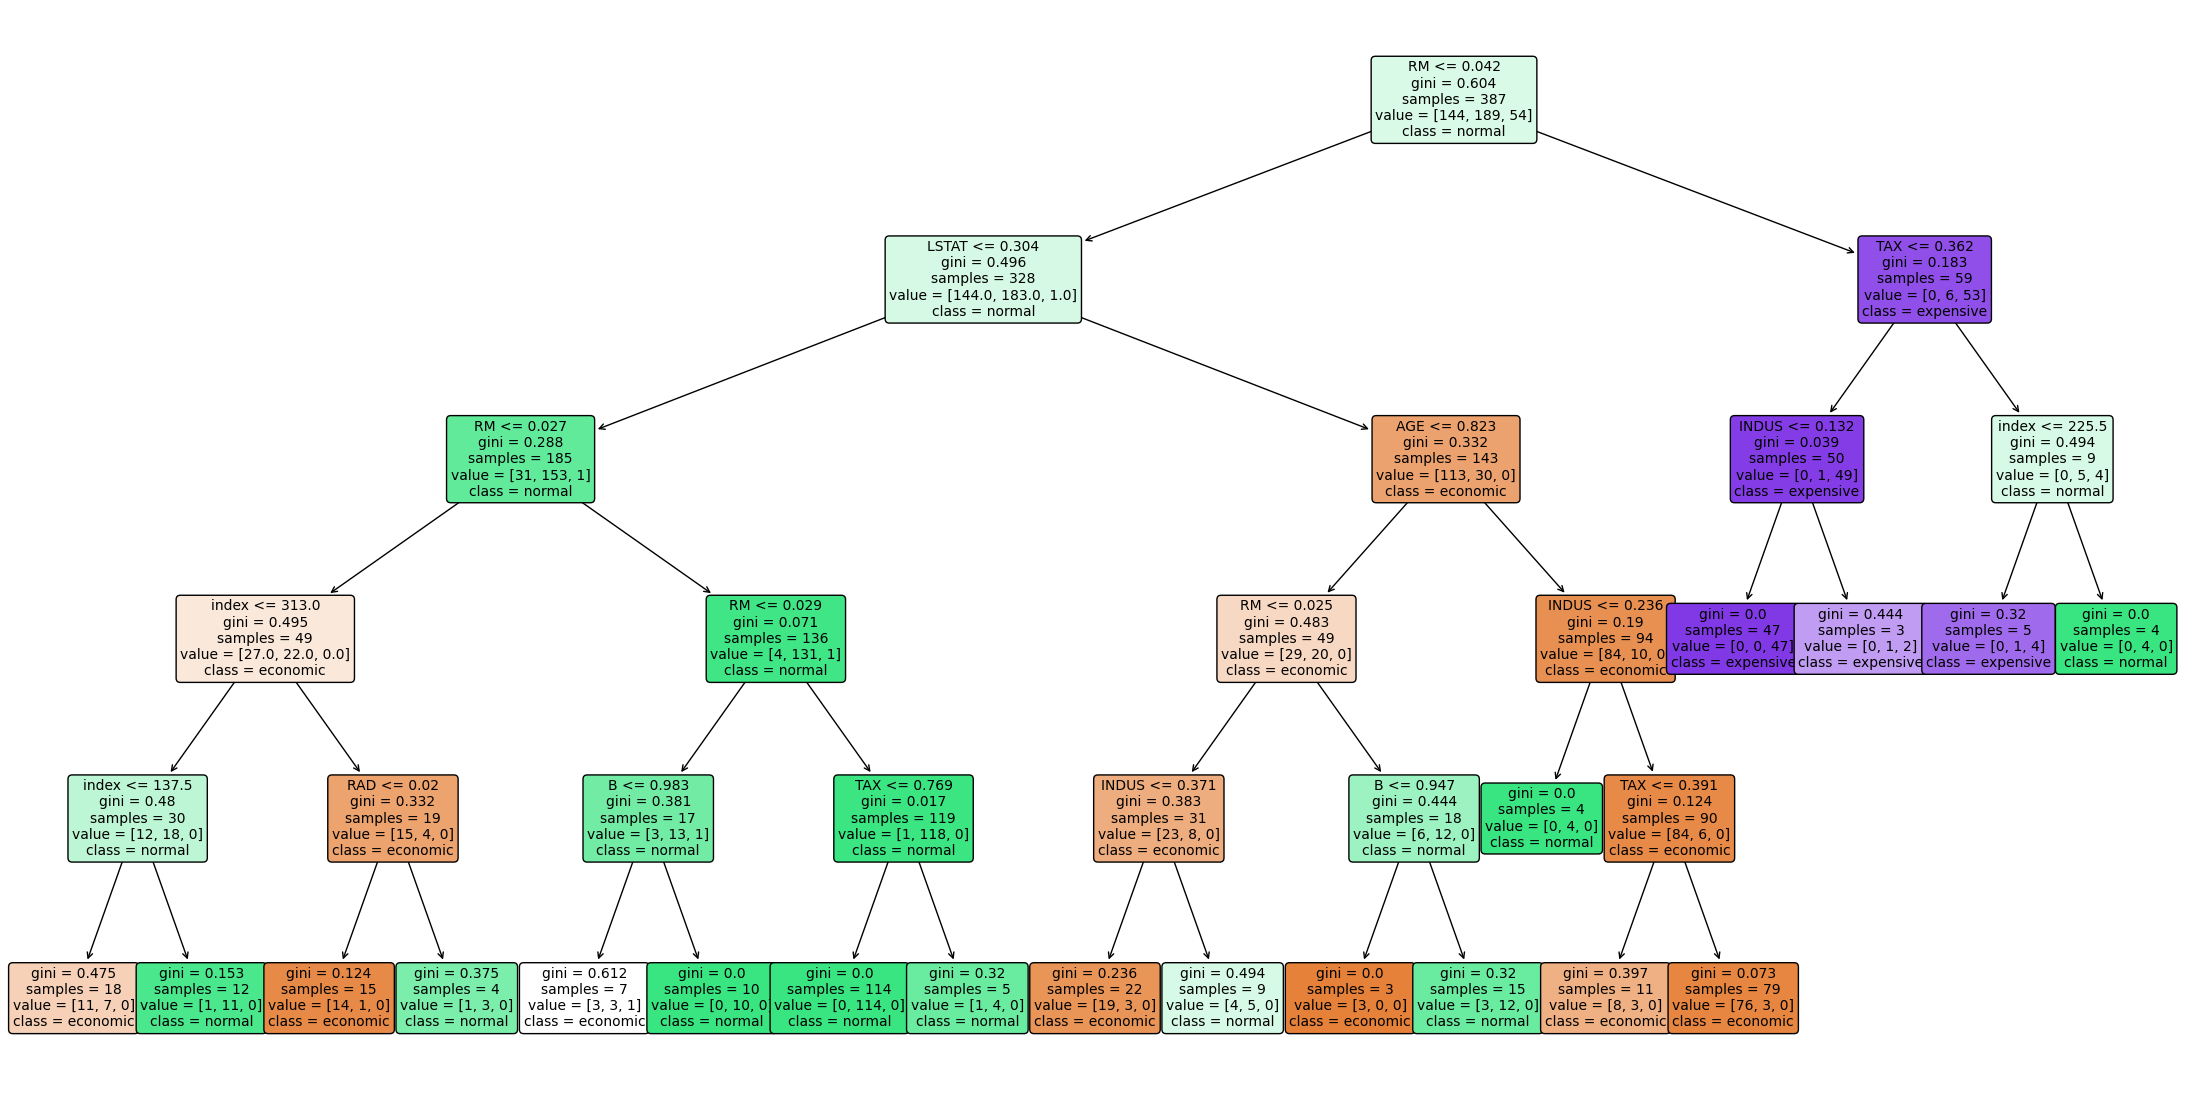

In [60]:

plt.figure(figsize=(28, 14))
plot_tree(decisionTree, filled=True, rounded=True, 
          feature_names=sorted_train_data.columns, 
          class_names=['economic', 'normal', 'expensive'], 
          impurity=True, fontsize=10, )
plt.show()

#### 29.When does Overfitting or Underfitting happen?

__*Symptoms of Overfitting :*__
- High training accuracy, but low test accuracy
- Model is able to fit the training data perfectly, but performs poorly on new data
- Model is overly specialized to the training data and fails to generalize well.

__*Overfitting Causes :*__
- Model complexity
- Noise in the data
- Over-parameterization

__*Symptoms of underfitting :*__
- Low training accuracy and low test accuracy
- Model is unable to fit the training data well, __and__ performs poorly on new data
- Model is too simple and lacks the capacity to capture the underlying patterns in the data

__*Underfitting Causes :*__
- Model simplicity
- Insufficient training data
- High bias -> meaning Model is unable to fit the training data well


# Ensemble (Phase 3)

#### 30. Why do we use ensemble and Its importance

We use ensemble methods for several reasons : 
- Improved accuracy
- Increased robustness (to outliers and noises)
- Better handling of complex data : handle complex data with multiple interactions and non-linear relationships 
- Reducing overfitting
- Improving interpretability : can provide a more interpretable model by combining the strengths of individual models.

Ensemble methods are important in today's machine learning landscape for several reasons :
- Complexity of modern datasets
- Need for robustness
- Advances in computing power : Cheap computing power has made it possible to train and combine multiple models, making ensemble methods more feasible.
- Real-world applications -> Such as image and speech recognition, natural language processing, recommender systems, and bioinformatics.

#### 31. Bagging & Boosting, Their main Idea and Differences

__*Boosting :*__
- The basic idea behind boosting is to __iteratively__ train models on the __same dataset__, with each subsequent model focusing on the __mistakes__ made by the previous model.

- __How Boosting Works :__
    - Initialize weights
    - Train a model
    - Calculate Errors
    - Update weights
    - Repeat
    - Combine models

__*Bagging :*__
- Bagging (Bootstrap Aggregating) combines multiple instances of the __same model__, trained on __different subsets__ of the training data.

- __How Bagging Works :__
    - Bootstrap sampling : Create multiple bootstrap samples from the original training dataset
        - _A bootstrap sample is a random sample of data that is drawn from an original dataset_
    - Train models (Each model is trained independently on a different bootstrap sample.)
    - Combine models

__*Boosting vs Bagging :*__
1. Iterative Training :
    * Boosting: Iterative training of models, with each model building upon the previous one.
    * Bagging: Independent training of models on different bootstrap samples.
2. Weight Updates
    * Boosting: Weights of training samples are updated based on errors made by previous model.
    * Bagging: __No weight updates__; each model is trained independently.
3. Focus on Mistakes
    * Boosting: Each model focuses on mistakes made by previous model.
    * Bagging: __No focus on mistakes__; each model is trained on a random subset of data.
4. Model Diversity
    * Boosting: Creates diverse models by __iteratively__ training on mistakes.
    * Bagging: Creates diverse models by training on __different bootstrap samples__.
5. Computational Complexity
    * Boosting: Can be __computationally expensive__ due to iterative training.
    * Bagging: Generally __faster__ and more parallelizable.
6. Overfitting
    * Boosting: More __prone to overfitting__ due to iterative training.
    * Bagging: More __robust to overfitting__ due to averaging effect.
7. Sampling
    * Boosting: No sampling; uses entire dataset for each model.
    * Bagging: Uses bootstrap sampling to create multiple datasets.

#### 32. Random Forrest 

Random Forest works by creating multiple __decision trees__, each trained on a __random subset of the training data__. The algorithm then __combines__ the predictions of all the trees to produce a final prediction.

__*Step by Step guide :*__
- __Bootstrap Sampling__ : Randomly select a subset of the training data
- __Decision Tree Training__ : Train a decision tree on the bootstrap sample.
- __Feature Randomness__ : Randomly select a subset of features to consider at each node of the decision tree.
- __Tree Construction__ : Construct the decision tree by recursively partitioning the data into smaller subsets based on the selected features.
- __Prediction__ : Make a prediction using the decision tree.
- __Repeat__ : Repeat steps 1-5 multiple times, creating multiple decision trees.
- __Voting__ : Combine the predictions of all the decision trees using a voting scheme (e.g., majority vote for classification, average for regression). 

#### 33. What is Bootstrapping in Random Forrests?

Bootstrapping refers to the process of creating __multiple bootstrap samples__ from the original training dataset. Each bootstrap sample is used to __train a decision tree__, which is then combined with other trees to form the Random Forest. Bootstrapping helps to __reduce overfitting__ (by randomness), __improves the robustness__ (by reducing outliers' impacts) and __increases diversity__.

#### 35. Number of Decision Trees' impact on Random Forrest performance

The number of trees is a __hyperparameter__ that controls the __complexity__ of the model and the trade-off between __bias__ and __variance__.Increasing the number of trees can reduce the bias of the model, but may also increase the variance. A __higher__ number of trees can lead to __overfitting__, especially if the trees are highly correlated. A higher number of trees also increases __model's complexity__ and the __computational cost__.
- For __small__ datasets (e.g., < 1000 samples), __10-50__ trees may be sufficient.
- For __medium__-sized datasets (e.g., 1000-10,000 samples), __50-200__ trees may be a good starting point.
- For __large__ datasets (e.g., > 10,000 samples), __200-500__ trees or more may be necessary.

#### 36. How does Random Forrest affect variance?

- __*Variance Reduction :*__
    - Random Forest __averages__ the predictions of __multiple decision trees__, which __reduces__ the variance of the model. Averaging helps to __smooth out the noise__ and fluctuations in the data.
    - Random Forest introduces __diversity__ in the decision trees by using __different subsets of features__, bootstrap samples, and __random__ feature selection. This diversity helps to __reduce the correlation__ between trees

#### 37. GridSearchCV with Random Forrest

Best Parameters : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 3}
Best Model Accuracy : 0.8682317682317683
____________________
Accuracy :  0.8289473684210527
Precision :  0.8457966764418376
Recall :  0.801720225127088
F1 Score :  0.8146772767462421


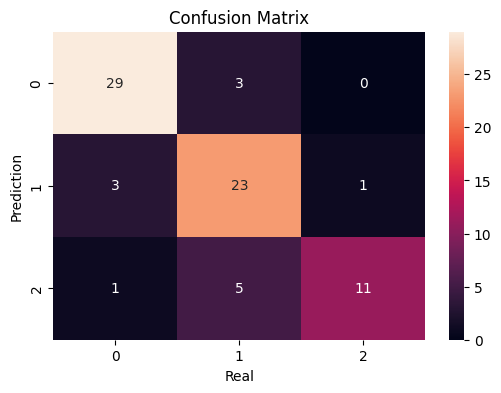

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

randomForrest = RandomForestClassifier()

param_grid = {
    'n_estimators': [2, 3, 4, 5, 7, 9, 10, 15, 25],
    'max_depth': [None, 1, 2, 3, 5, 7],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(randomForrest, param_grid, cv=5, scoring='accuracy')
grid_search.fit(sorted_train_data.drop(['label', 'MEDV'], axis=1), sorted_train_data['label'], )
bestRandomForrest = grid_search.best_estimator_

print(f"Best Parameters : {grid_search.best_params_}")
print(f"Best Model Accuracy : {grid_search.best_score_}")
print("____________________")

randomForrestPred = bestRandomForrest.predict(sorted_test_data.drop(['label', 'MEDV'], axis=1))

print('Accuracy : ', accuracy_score(sorted_test_data['label'], randomForrestPred))
print('Precision : ', precision_score(sorted_test_data['label'], randomForrestPred, average='macro'))
print('Recall : ', recall_score(sorted_test_data['label'], randomForrestPred, average='macro'))
print('F1 Score : ', f1_score(sorted_test_data['label'], randomForrestPred, average='macro'))

plt.figure(figsize=(6, 4))
sbn.heatmap(confusion_matrix(sorted_test_data['label'].to_numpy(), randomForrestPred), annot=True)
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

# XGBoost (*Extreme Gradient Boosting*)

#### 38. How does XGBoost work ?

Gradient Boosting is a family of machine learning algorithms that __combine__ multiple weak models to create a strong predictive model. The idea is to iteratively train multiple models (similar to ensemble), each of which tries to correct the errors of the previous model.
- __*How does XGBoost work ?*__
    - __Data Preparation__
    - __Base Learner__ (typically a decision tree)
    - __Initialization__ (set of parameters, including the learning rate, maximum depth, and number of estimators)
    - __Iterative Training__ :
        - Prediction
        - Error Calculation
        - Gradient Calculation (gradient of the loss function with respect to the predicted values)
        - Update
    - __Tree Construction__ (new)
    - __Leaf Node__ Prediction
    - __Model Update__ (dding the new tree to the ensemble, and the process is repeated for multiple iterations)
    - __Prediction__

#### 39. What is Gradient Boost, Boosting Tree vs. Decision Tree

Based on the concept of gradient descent, Instead of using gradient descent to optimize a single model, Gradient Boosting uses gradient descent to optimize an ensemble of models.
<table>
  <tr>
    <th> </th>
    <th>Decision Tree</th>
    <th>Gradient Boosting</th>
  </tr>
  <tr>
    <td><b>Accuracy</b></td>
    <td> Limited accuracy </td>
    <td> High accuracy </td>
  </tr>
  <tr>
    <td><b>Interpretability</b></td>
    <td> Easy to interpret </td>
    <td> Difficult to interpret </td>
  </tr>
  <tr>
    <td><b>Handling Missing Values</b></td>
    <td> Handles missing values </td>
    <td> Handles missing values </td>
  </tr>
  <tr>
    <td><b>Handling Non-Linear Relationships</b></td>
    <td> Handles non-linear relationships </td>
    <td> Handles complex interactions </td>
  </tr>
  <tr>
    <td><b>Computational Complexity</b></td>
    <td> Low computational complexity </td>
    <td> High computational complexity </td>
  </tr>
  <tr>
    <td><b>Overfitting</b></td>
    <td> Prone to overfitting </td>
    <td> Prone to overfitting </td>
  </tr>
</table>

#### 39. XGBoost using GridSearchCV

Best Parameters :  {'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 100}
Accuracy :  0.7763157894736842
Precision :  0.8336526181353768
Recall :  0.7600535584604212
F1 Score :  0.7785150490068523


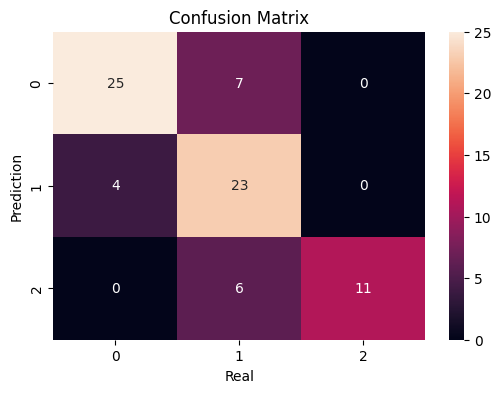

In [57]:
import xgboost as xgb

XGBoost = xgb.XGBClassifier()
param_grid = {
    'max_depth': [1, 2, 3, 5, 7],
    'learning_rate': [0.08, 0.1, 0.25, 0.5, 1], 
    'n_estimators': [10, 25, 50, 100, 150, 200]
    }

grid_search = GridSearchCV(XGBoost, param_grid, cv=5, scoring='accuracy')
grid_search.fit(sorted_train_data.drop(['label', 'MEDV'], axis=1), sorted_train_data['label'])

print('Best Parameters : ', grid_search.best_params_)

XGBoostPred = grid_search.best_estimator_.predict(sorted_test_data.drop(['label', 'MEDV'], axis=1))

print('Accuracy : ', accuracy_score(sorted_test_data['label'], XGBoostPred))
print('Precision : ', precision_score(sorted_test_data['label'], XGBoostPred, average='macro'))
print('Recall : ', recall_score(sorted_test_data['label'], XGBoostPred, average='macro'))
print('F1 Score : ', f1_score(sorted_test_data['label'], XGBoostPred, average='macro'))

plt.figure(figsize=(6, 4))
sbn.heatmap(confusion_matrix(sorted_test_data['label'].to_numpy(), XGBoostPred), annot=True)
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

# Support Vector Maching (Phase 5)

#### 40. Linear & RBF

Accuracy :  0.7894736842105263
Precision :  0.8458781362007168
Recall :  0.7540168845315903
F1 Score :  0.7704517704517704


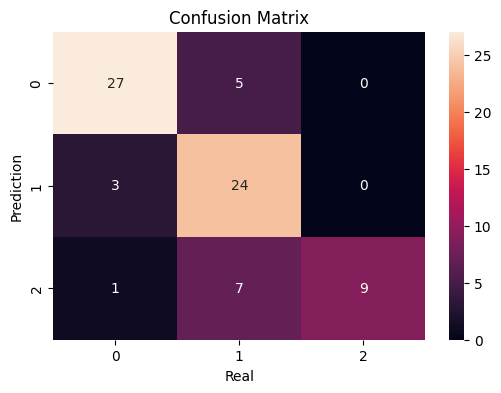

In [58]:
from sklearn.svm import SVC

SVM = SVC(kernel='linear', C=1, gamma=0.1)
SVM.fit(sorted_train_data.drop(['label', 'MEDV'], axis=1), sorted_train_data['label'])

svmPred = SVM.predict(sorted_test_data.drop(['label', 'MEDV'], axis=1))

print('Accuracy : ', accuracy_score(sorted_test_data['label'], svmPred))
print('Precision : ', precision_score(sorted_test_data['label'], svmPred, average='macro'))
print('Recall : ', recall_score(sorted_test_data['label'], svmPred, average='macro'))
print('F1 Score : ', f1_score(sorted_test_data['label'], svmPred, average='macro'))

plt.figure(figsize=(6, 4))
sbn.heatmap(confusion_matrix(sorted_test_data['label'].to_numpy(), svmPred), annot=True)
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

Accuracy :  0.6973684210526315
Precision :  0.7473118279569894
Recall :  0.6680510167029775
F1 Score :  0.6813186813186812


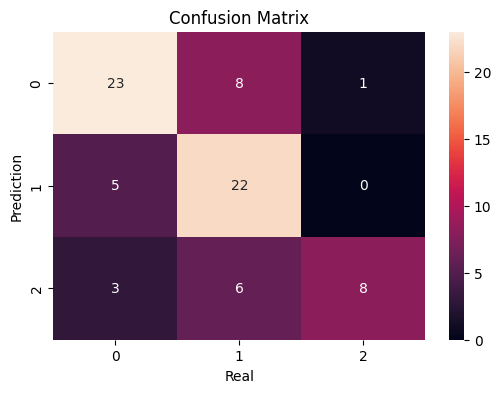

In [59]:
SVM = SVC(kernel='rbf', C=1, gamma=0.1)
SVM.fit(sorted_train_data.drop(['label', 'MEDV'], axis=1), sorted_train_data['label'])

svmPred = SVM.predict(sorted_test_data.drop(['label', 'MEDV'], axis=1))

print('Accuracy : ', accuracy_score(sorted_test_data['label'], svmPred))
print('Precision : ', precision_score(sorted_test_data['label'], svmPred, average='macro'))
print('Recall : ', recall_score(sorted_test_data['label'], svmPred, average='macro'))
print('F1 Score : ', f1_score(sorted_test_data['label'], svmPred, average='macro'))

plt.figure(figsize=(6, 4))
sbn.heatmap(confusion_matrix(sorted_test_data['label'].to_numpy(), svmPred), annot=True)
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

#### Random Search or Grid Search?

- `GridSearchCV `is a good choice when we have a small number of hyperparameters, want to explore the entire hyperparameter space, and have a small dataset
- `RandomSearchCV` is a better option when you have a large number of hyperparameters, want to reduce computational cost, and want to avoid overfitting

In general, RandomSearchCV is a good starting point for SVM hyperparameter tuning, especially with large datasets or many hyperparameters. 

__*Evaluation :*__
- What are micro, macro, and weighted metrics?
    - __Micro metrics__ : Calculate metrics globally, by counting the total true positives, false positives, and false negatives.
    - __Macro metrics__ : Calculate metrics for each label, and find their unweighted mean. This gives equal weight to each label, regardless of its frequency.
    - __Weighted metrics__ : Calculate metrics for each label, and find their weighted mean, where the weights are the proportion of true instances for each label.